<a href="https://colab.research.google.com/github/monisakhtar/ML/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [159]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [160]:
# Importing basic libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

pd.set_option('display.max_columns',None)

In [161]:
# importing train and test data
train = pd.read_csv('/content/drive/MyDrive/Datasets/Titanic/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Datasets/Titanic/test.csv')
# Shape of dataset with rows and columns
train.shape

(891, 12)

In [162]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [163]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [164]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Handling Missing Values

In [165]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [166]:
def Missing():
    Missingfeature = [feature for feature in train.columns if train[feature].isna().sum() > 0]

    for feature in Missingfeature:
      print(feature, np.round(train[feature].isna().mean()*100, 4), '% missing values')

In [167]:
Missing()

Age 19.8653 % missing values
Cabin 77.1044 % missing values
Embarked 0.2245 % missing values


About 77% of data in Cabin column is missing. So we will ignore the cabin column

In [168]:
train  = train.drop(columns = 'Cabin', axis = 1)

In [169]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


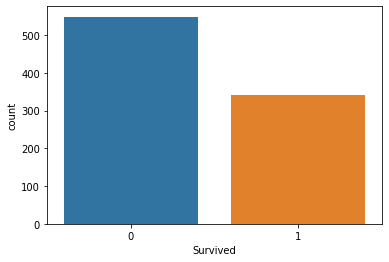

In [170]:
sns.countplot(x = 'Survived', data = train)

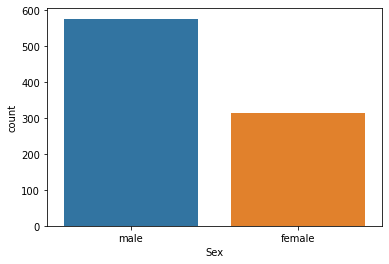

In [171]:
sns.countplot(x = 'Sex', data = train)

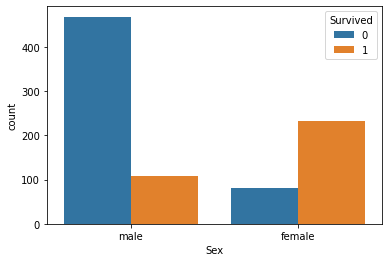

In [172]:
sns.countplot(x = 'Sex', hue = 'Survived', data = train)

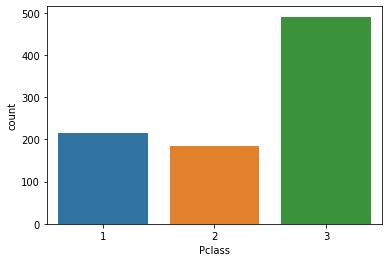

In [173]:
sns.countplot(x = 'Pclass', data = train)

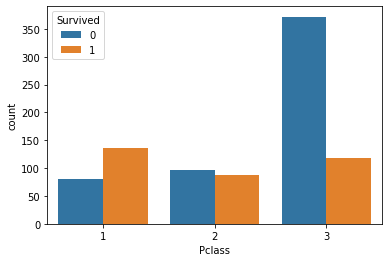

In [174]:
sns.countplot(x = 'Pclass', hue = 'Survived', data = train)

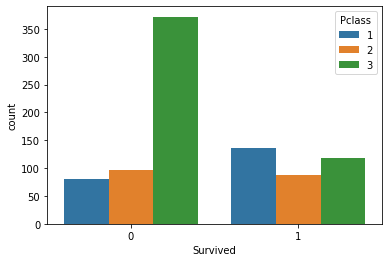

In [175]:
sns.countplot(hue = 'Pclass', x = 'Survived', data = train)

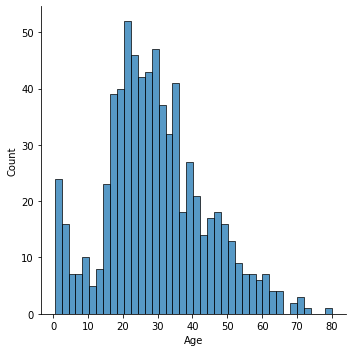

In [176]:
sns.displot(train['Age'].dropna(),kde = False, bins = 40)

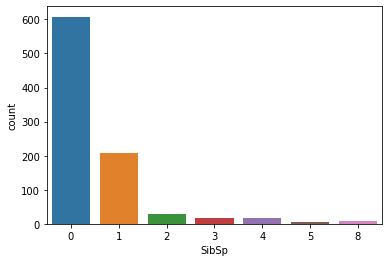

In [177]:
sns.countplot(x = 'SibSp', data = train)

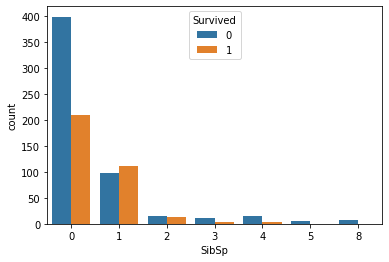

In [178]:
sns.countplot(x = 'SibSp',hue = 'Survived', data = train)

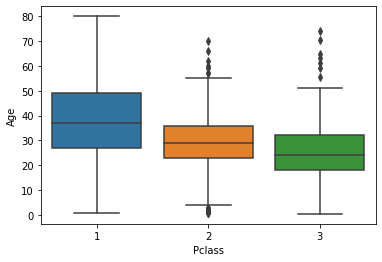

In [179]:
sns.boxplot(x = 'Pclass', y = 'Age', data = train)

In [180]:
Age = train.groupby('Pclass')['Age'].mean()
Age

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [181]:
Age[1]

38.233440860215055

In [182]:
np.round(36.434567, 0)

36.0

In [183]:
train_copy = train.copy()

In [184]:
def impute_age(cols):
  age = cols[0]
  pclass = cols[1]

  if pd.isna(age):
    return np.round(Age[pclass], 2)

  else:
    return age

In [185]:
train['Age'].isna().sum()

177

In [186]:
#def fill_age(cols):
#  train[cols[0]] = train[[cols[0], cols[1]]].apply(impute_age, axis = 1)

In [187]:
#col = ['Age', 'Pclass']
#fill_age(col)

In [188]:
#train_copy['Age'] = train_copy[['Age', 'Pclass']].apply(impute_age, axis = 1)

In [189]:
train['Age'].isna().sum()

177

In [190]:
Missing()

Age 19.8653 % missing values
Embarked 0.2245 % missing values


In [191]:
train['Embarked'].mode()

0    S
dtype: object

In [192]:
# Replacing the Embarked missing value with most frequent value.
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace = True)


In [193]:
Missing()

Age 19.8653 % missing values


In [194]:
train.groupby('Pclass').mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


# Data Analysis

In [195]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [196]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [197]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

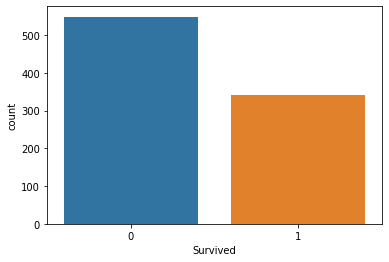

In [198]:
sns.countplot(x = 'Survived', data = train)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


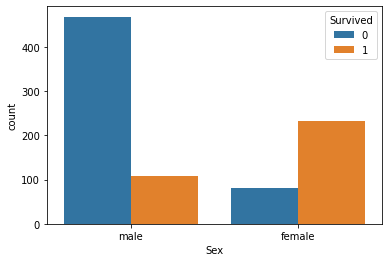

In [199]:
sns.countplot('Sex', hue = 'Survived', data = train)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


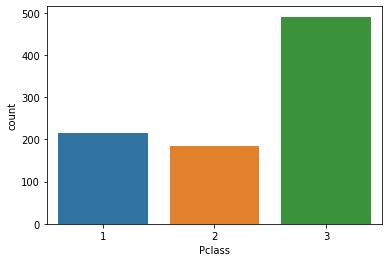

In [200]:
sns.countplot('Pclass', data = train)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


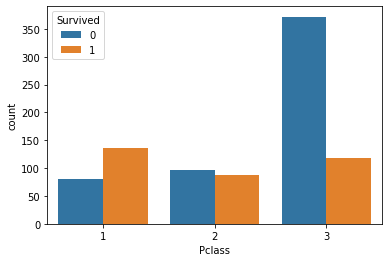

In [201]:
sns.countplot('Pclass', hue = 'Survived', data = train)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


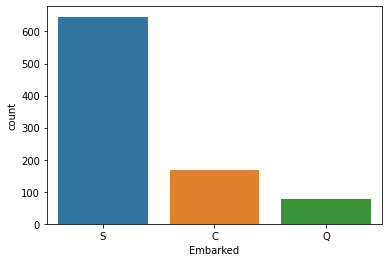

In [202]:
sns.countplot('Embarked', data = train)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


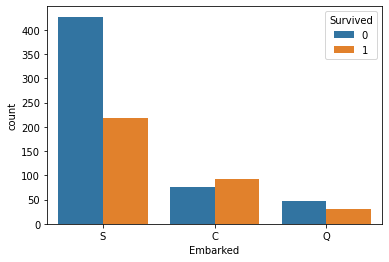

In [203]:
sns.countplot('Embarked', hue = 'Survived', data = train)

# Pipeline

In [256]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, FunctionTransformer

from sklearn.compose import ColumnTransformer

num_pipeline = Pipeline([
        ("scaler", StandardScaler())
    ])

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
cat_pipeline = Pipeline([
        ("ordinal_encoder", OrdinalEncoder()),    
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("cat_encoder", OneHotEncoder(sparse=False)),
    ])


def impute_age(cols, mean_age):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        return np.round(mean_age[Pclass],2)
    else:
        return Age 

def fill_age(X):
    X_copy = X.copy()
    X_copy.dropna(subset=['Age'], inplace=True)
    mean_age = X_copy.groupby('Pclass')['Age'].mean()
    X['Age'] = X[["Age", "Pclass"]].apply(impute_age, axis = 1, args=(mean_age,))


def age_pipeline(): 
    return make_pipeline(
        FunctionTransformer(fill_age))
    

age_attribs = ["Age", 'Pclass']
num_attribs = ["Age", "SibSp", "Parch", "Fare"]
cat_attribs = ["Pclass", "Sex", "Embarked"]

preprocess_pipeline = ColumnTransformer([
        ('filling', age_pipeline(), age_attribs),
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs)
    ])

In [257]:
X_train = preprocess_pipeline.fit_transform(train)
X_train

ValueError: ignored

In [225]:
y_train = train["Survived"]

In [226]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
forest_clf.fit(X_train, y_train)

ValueError: ignored

In [ ]:
X_test = preprocess_pipeline.transform(test)
y_pred = forest_clf.predict(X_test)

In [ ]:
train["AgeBucket"] = train["Age"] // 15 * 15
train[["AgeBucket", "Survived"]].groupby(['AgeBucket']).mean()

In [ ]:
train['AgeGroup'] = pd.cut(train['Age'], [0, 18, 30, 65, 100], labels=['child', 'teenager', 'adult', 'senior'])
train.head()

In [ ]:
train["RelativesOnboard"] = train["SibSp"] + train["Parch"]
train[["RelativesOnboard", "Survived"]].groupby(
    ['RelativesOnboard']).mean()

In [ ]:
corr_matrix = train.corr()
corr_matrix['Survived'].sort_values(ascending = False)